**Знакомство с задачей**

In [110]:
import pandas as pd

In [111]:
data=pd.read_csv('visits.csv', sep='\t')

In [112]:
data.head()

,date_time,id,time_spent,name
0,20180406T165358,76144fb2,98.0,Василёк
1,20180404T173913,76144fb2,15.0,Василёк
2,20180403T172824,76144fb2,220.0,Василёк
3,20180407T070441,76144fb2,19.0,Василёк
4,20180404T132049,76144fb2,14.0,Василёк


**Применяем сводные таблицы**

In [113]:
name_stat=data.pivot_table(index='name', values='time_spent')

In [114]:
print(name_stat.head())

          time_spent
name                
Агератум  337.802721
Амарант   132.760012
Аммобиум  256.708042
Арктотис   73.879984
Астильба  376.143149


**Базовая проверка данных**

In [115]:
total_visits=len(data)
print(f'Колличество заездов на АЗС: {total_visits}')

Колличество заездов на АЗС: 317104


In [116]:
total_stations=len(data['id'].unique())
print(f'Количество АЗС: {total_stations}')

Количество АЗС: 471


In [117]:
print(min(data['date_time']), max(data['date_time']))

20180402T000008 20180408T235957


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317104 entries, 0 to 317103
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date_time   317104 non-null  object 
 1   id          317104 non-null  object 
 2   time_spent  317104 non-null  float64
 3   name        317104 non-null  object 
dtypes: float64(1), object(3)
memory usage: 6.0+ MB


In [119]:
from datetime import datetime

In [120]:
data['date']=pd.to_datetime(data['date_time'], format='%Y%m%dT%H%M%S').dt.date

In [121]:
data['time']=pd.to_datetime(data['date_time'], format='%Y%m%dT%H%M%S').dt.time

In [122]:
data.head()

,date_time,id,time_spent,name,date,time
0,20180406T165358,76144fb2,98.0,Василёк,2018-04-06,16:53:58
1,20180404T173913,76144fb2,15.0,Василёк,2018-04-04,17:39:13
2,20180403T172824,76144fb2,220.0,Василёк,2018-04-03,17:28:24
3,20180407T070441,76144fb2,19.0,Василёк,2018-04-07,07:04:41
4,20180404T132049,76144fb2,14.0,Василёк,2018-04-04,13:20:49


In [123]:
print(min(data['date']), max(data['date']))

2018-04-02 2018-04-08


In [124]:
total_days=abs((min(data['date'])-max(data['date']))).days+1

In [125]:
print(abs(total_days))

7


In [126]:
station_visits_per_day=(total_visits/total_stations)/total_days

In [127]:
print(f'Количество заездов на АЗС в сутки: {station_visits_per_day}')

Количество заездов на АЗС в сутки: 96.17955717318775


In [128]:
print(data['name'].value_counts().head(10))

name
Календула      85648
Василёк        79006
Георгина       34356
Немезия        20138
Колокольчик    18835
Мальва         17386
Гейхера        14125
Доротеантус     6312
Нарцисс         3640
Амарант         3221
Name: count, dtype: int64


**Гистограмма**

In [129]:
import matplotlib.pyplot as plt

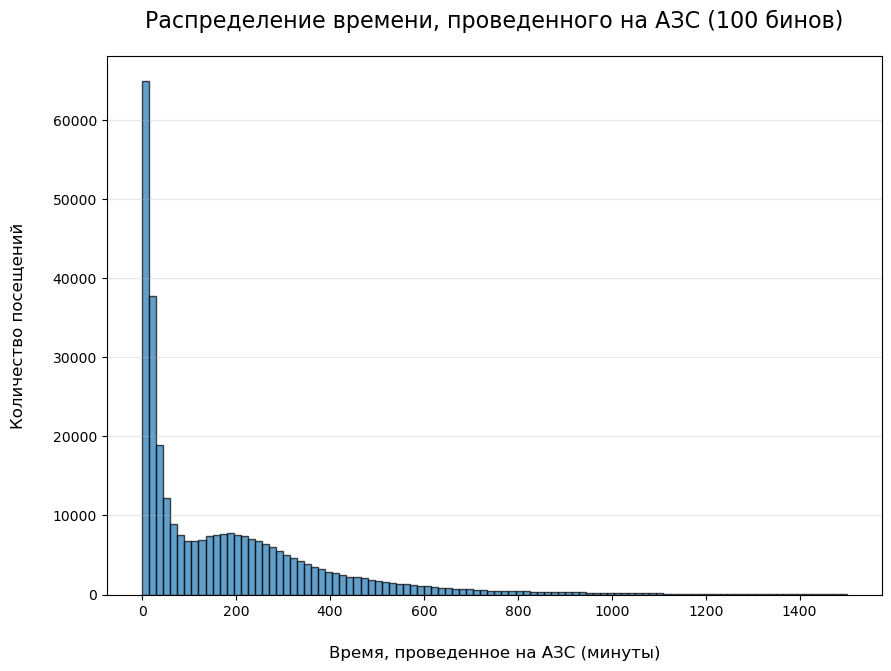

In [130]:
plt.figure(figsize=(10, 7))
plt.hist(data['time_spent'], bins=100, range=(0, 1500), edgecolor='black', alpha=0.7)
plt.title('Распределение времени, проведенного на АЗС (100 бинов)', fontsize=16, pad=20)
plt.xlabel('Время, проведенное на АЗС (минуты)', fontsize=12, labelpad=20 )
plt.ylabel('Количество посещений', fontsize=12, labelpad=20 )
plt.grid(axis='y', alpha=0.3)

**Гистограмма для двух кубиков**

In [131]:
import random

In [139]:
# Функция, имитирующая один бросок монеты.
# От англ. coin - монета, flip - бросок монеты.
def coin_flip():
    # возможны два варианта:
    # - выпала решка, это +0 орлов
    # - выпал орёл, это +1 орёл
    score = random.randint(0, 1)
    return score

# Функция для суммирования числа орлов в нескольких бросках.
# Орёл и решка переводятся на английский как heads и tails.
# Аргумент repeat говорит, сколько раз бросать монету
# (от англ. repeat - повторение).
def flips_heads(repeat):
    total = 0
    for i in range(repeat):
        flip = coin_flip()
        total += flip
    return total        

In [140]:
# Cоздаём пустой список. В него мы
# будем складывать результаты экспериментов.

experiments = []

def run_experiments(a, b):
    """a - количество экспериментов, b - бросков в каждом"""
    
    for i in range(a):
        res = flips_heads(b)
        experiments.append(res)
    
    return experiments

# Запускаем 1000 экспериментов по 1000 бросков
df_experiments=run_experiments(1000, 10)

print(f"Количество экспериментов: {len(experiments)}")
# Теперь experiments содержит 1000 чисел (результатов экспериментов)
print(f"Первые 10 результатов: {experiments[:10]}")

Количество экспериментов: 1000
Первые 10 результатов: [5, 3, 7, 7, 4, 7, 7, 7, 5, 3]


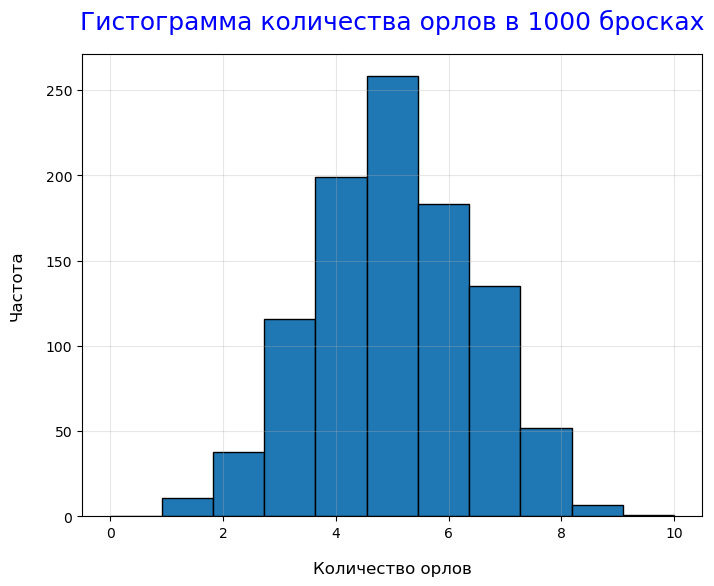

In [142]:
plt.figure(figsize=(8, 6))
plt.hist(df_experiments, bins=11,range=(0, 10), edgecolor='black')
plt.title('Гистограмма количества орлов в 1000 бросках', fontsize=18, pad=18, color='blue')
plt.xlabel('Количество орлов', fontsize=12, labelpad=15)
plt.ylabel('Частота', fontsize=12, labelpad=15)
plt.grid( alpha=0.3)

**Гистограмма для двух кубиков**

In [147]:
# Функция, имитирующая время ожидания автобуса.
# (от англ. bus - автобус, wait - ждать, time - время)
def bus_wait_time():
    return random.randint(0, 10)
# Функция, имитирующая время ожидания поезда в метро.
# (от англ. train - поезд, wait - ждать, time - время)
def train_wait_time():
    return random.randint(0, 5)
# Функция подсчёта полного опоздания за день.
# от англ. total - полный, итоговый, delay - задержка, опоздание
def total_delay():
    # обратите внимание, как в Python переносят длинные строки
    return (
        bus_wait_time()
        + train_wait_time()
        + train_wait_time()
        + bus_wait_time()
    )

In [153]:
days=[]
for i in range(365*5):
    delay=total_delay()
    days.append(delay)

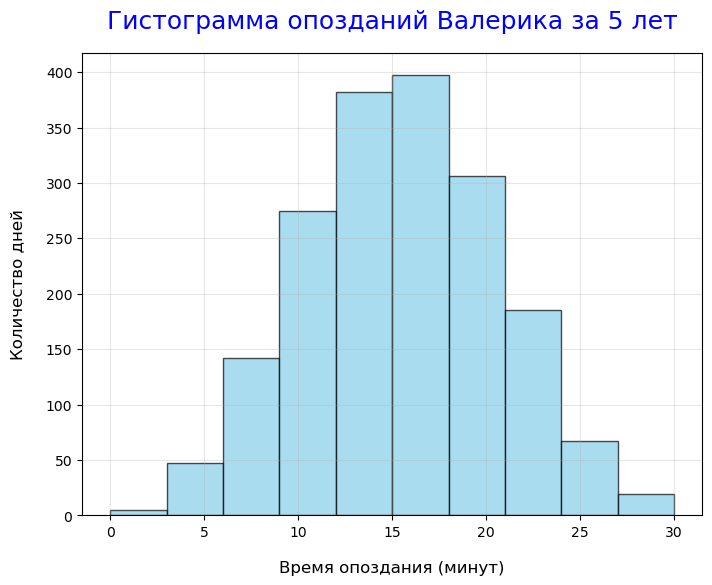

In [164]:
plt.figure(figsize=(8, 6))
plt.hist(days, bins=10, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Гистограмма опозданий Валерика за 5 лет', color='blue', fontsize=18, pad=18)
plt.xlabel('Время опоздания (минут)', fontsize=12, labelpad=15)
plt.ylabel('Количество дней', fontsize=12, labelpad=15)
plt.grid(alpha=0.3)

**Диаграмма размаха в Python**

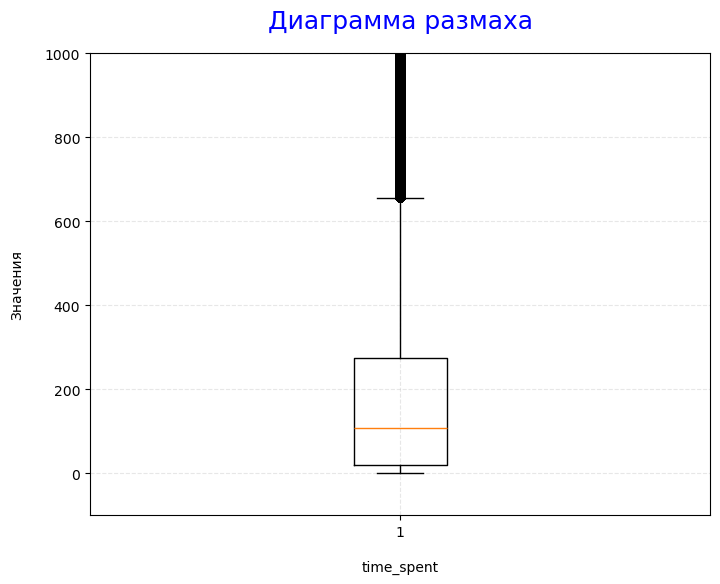

In [180]:
plt.figure(figsize=(8, 6))
plt.boxplot(data['time_spent'] )
plt.ylim(-100, 1000)
plt.title('Диаграмма размаха', fontsize=18, color='blue', pad=18)
plt.xlabel('time_spent', labelpad=15)
plt.ylabel('Значения', labelpad=15)
plt.grid(alpha=0.3, linestyle='--')

